# Section 7 - Classification Models: Naive Bayes, LDA, QDA

Goals:

- Review lecture content on classification methods;
- Better understand Naive Bayes, Linear and Quadratic Discriminant Analysis (LDA and QDA) models;
- Get a practical sense on model assessment (hypothesis and performance).

You should have downloaded:
- heart.csv
- gnb-lda-qda.png

# 1: Preprocessing

For this section we will use the [Heart Failure Clinical Records Dataset](https://archive.ics.uci.edu/ml/datasets/Heart%2Bfailure%2Bclinical%2Brecords). This dataset contains the medical records of patients who had heart failure, collected during their follow-up period. Each patient profile has 13 clinical features, followed by a label describing if the patient survived or not.

**Task:**
- Load the [Heart Failure Clinical Records Dataset](https://archive.ics.uci.edu/ml/datasets/Heart%2Bfailure%2Bclinical%2Brecords) from `heart.csv`
- Store the following quantitative variables as predictors:
    1. `age`
    2. `creatinine_phosphokinase`
    3. `ejection_fraction`
    4. `platelets`
    5. `serum_creatinine`
    6. `serum_sodium`
    - Use a log transformation on the predictors to make them look more like a Gaussian R.V. 
- Define `y` as the column `DEATH_EVENT` of the dataset. This is the target we want to eventually predict.

In [2]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("heart.csv")

predictors = ["age", "creatinine_phosphokinase", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
X = dataset[predictors]
X = np.log(X)

print(f"X shape: {X.shape}")
X.head()

X shape: (299, 6)


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
0,4.317488,6.366470,2.995732,12.487485,0.641854,4.867534
1,4.007333,8.969669,3.637586,12.481270,0.095310,4.912655
2,4.174387,4.983607,2.995732,11.995352,0.262364,4.859812
3,3.912023,4.709530,2.995732,12.254863,0.641854,4.919981
4,4.174387,5.075174,2.995732,12.697715,0.993252,4.753590


In [3]:
y = dataset["DEATH_EVENT"]
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

Split the data into training and testing
- test_size = 1/3
- random_state = 1234

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

X_train = X_train.reset_index(drop=True)
X_test  = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test  = y_test.reset_index(drop=True)

# 2: Model Fitting
GNB, LDA, QDA's models all look something like finding the best posterior amongst the classes $C_k$ (in our case $k=0,1$ for death events)
$$
\text{posterior for class k} \ = \ P(C_k \lvert\,\boldsymbol{x}) \  = \ \frac{\pi(C_k)\,{\color{red}{{\cal{}L}_{\!\boldsymbol{x}}(C_k)}}}{Z}.
$$
The key is in the likelihood ${\color{red}{{\cal{}L}_{\!\boldsymbol{x}}(C_k)}}$.
$$
\text{GNB: }  {\cal{}N} \left( \mu_k, {\color{orange}{D}} \right), \quad \text{LDA: }  {\cal{}N} \left( \mu_k, {\color{orange}{\Sigma}} \right), \quad \text{QDA: }  {\cal{}N} \left( \mu_k, {\color{orange}{\Sigma_k}} \right).
$$
The models are best suited to the following types of data, in increasing complexity.

![](gnb-lda-qda.png)

$$ 
GNB: \ 
D_0 = \begin{pmatrix} 1&0\\0&1\end{pmatrix},
\
D_1 = \begin{pmatrix} 3&0\\0&0.5\end{pmatrix}
\qquad
LDA: \ 
\Sigma = \begin{pmatrix} 2&0.7\\0.7&1\end{pmatrix}
\qquad
QDA: \
\Sigma_0 = \begin{pmatrix} 2&0.7\\0.7&1\end{pmatrix},
\
\Sigma_1 = \begin{pmatrix} 1&-0.5\\-0.5&1\end{pmatrix}.
$$

In [5]:
# ---------- CODE TO GENERATE FIGURE -----------

# from scipy.stats import multivariate_normal as mvn
# import matplotlib.pyplot as plt

# npts = 100
# gnb_data1 = mvn.rvs([5,2],[[3,0], [0,0.5]],npts)
# gnb_data2 = mvn.rvs([-1,-3],[[1,0], [0,1]],npts)
# lda_data1 = mvn.rvs([5,2],[[2,0.7], [0.7,1]],npts)
# lda_data2 = mvn.rvs([-1,-3],[[2,0.7], [0.7,1]],npts)
# qda_data1 = mvn.rvs([5,2],[[1,-0.5], [-0.5,1]],npts)
# qda_data2 = mvn.rvs([-1,-3],[[2,0.7], [0.7,1]],npts)

# _, ax = plt.subplots(1,3, figsize=(9,2))
# ax[0].scatter(gnb_data1[:,0],gnb_data1[:,1])
# ax[0].scatter(gnb_data2[:,0],gnb_data2[:,1])
# ax[0].axis('equal')
# ax[0].set_title('GNB')
# ax[1].scatter(lda_data1[:,0],lda_data1[:,1])
# ax[1].scatter(lda_data2[:,0],lda_data2[:,1])
# ax[1].axis('equal')
# ax[1].set_title('LDA')
# ax[2].scatter(qda_data1[:,0],qda_data1[:,1])
# ax[2].scatter(qda_data2[:,0],qda_data2[:,1])
# ax[2].axis('equal')
# ax[2].set_title('QDA')

# # plt.savefig('gnb-lda-qda.png')

**Discuss:**

What are the essential differences between the implementation of GNB, LDA, and QDA? Write them out below.
1. prior calculation? 
    
    **Ans:** same

2. likelihood calculation?

    **Ans:**
    - means are same
    - GNB: covariance matrix of normal dist is diagonal matrix, with each feature's variance from each class on the diagonal
    - LDA: covarianec matrix of normal dist is same covariance matrix of entire training data
    - QDA: covariance matrix of normal dist is diff covariance matrix corresponding to training data from each class
3. posterior calculation? 
    
    **Ans:** same

4. number of parameters needed to describe the model (complexity)? (Let $K$ be the number of classes, $d$ be dimension of data.)

    **Ans:** The number of parameters to describe the mean is the same across all models, so $Kd$ parameters. 
    
    Covariance matrix is where we see the difference.
    - GNB: Different diagonal matrix for all classes, so $Kd$ more parameters.
    - LDA: Same symmetric matrix for all classes, so $\approx \frac{d^2}{2}$ more parameters.
    - QDA: Different symmetric matrix for all classes, so $\approx K\frac{d^2}{2}$ more parameters.

**Task:**

Create a prediction function `predict()` that implements all models. 
- Fit the prior and likelihood to the training data
    - Note: Infer prior probabilities from class proportions
- evaluate likelihood at test points
- Use posterior to predict `DEATH_EVENT` at test points. 

In [6]:
from scipy.stats import multivariate_normal

def predict(X_train, y_train, X_test, model):
    # prior
    prior0 = len(y_train[y_train == 0]) / len(y_train)
    prior1 = len(y_train[y_train == 1]) / len(y_train)

    # likelihood for each class
    X0 = X_train.iloc[y_train[y_train==0].index, :]
    X1 = X_train.iloc[y_train[y_train==1].index, :]
    
    mu0 = X0.mean()
    mu1 = X1.mean()
    
    if model == 'gnb':
        Sigma0 = X0.var()
        Sigma1 = X1.var()
        # print(Sigma0)  # note the dimensions of Sigma0
    elif model == 'lda':
        Sigma0 = X_train.cov()
        Sigma1 = Sigma0
    elif model == 'qda':
        Sigma0 = X0.cov()
        Sigma1 = X1.cov()

    likelihood0 = multivariate_normal.pdf(X_test, mean=mu0, cov=Sigma0)
    likelihood1 = multivariate_normal.pdf(X_test, mean=mu1, cov=Sigma1)

    # posterior
    # Since we want to predict the class label, we can ignore
    # the normalization factor. Just select the one with greatest
    # unnormalized posterior.
    posterior0 = prior0 * likelihood0
    posterior1 = prior1 * likelihood1 

    return (posterior0 < posterior1).astype(int)

# 3: Model Asessment
## 3.1 Accuracy
For each model, print the accuracy on the dataset.

In [7]:
def accuracy(pred_y, true_y):
    n = pred_y.shape[0]
    return 100*np.sum(pred_y == true_y) / n

gnb_acc = accuracy(predict(X_train, y_train, X_test, 'gnb'), y_test)
lda_acc = accuracy(predict(X_train, y_train, X_test, 'lda'), y_test)
qda_acc = accuracy(predict(X_train, y_train, X_test, 'qda'), y_test)

print(f"Acc. GNB Model: {np.round(gnb_acc, 2)}%")
print(f"Acc. LDA Model: {np.round(lda_acc, 2)}%")
print(f"Acc. QDA Model: {np.round(qda_acc, 2)}%")

Acc. GNB Model: 78.89%
Acc. LDA Model: 80.0%
Acc. QDA Model: 80.0%


## 3.2 Is data approapriate for models? Check assumptions.
### 3.2.1 Check independence/covariance

In [8]:
# data corresponding to each class
X0 = X.iloc[y[y==0].index, :]
X1 = X.iloc[y[y==1].index, :]

#### GNB
- Predictors are **independent**.

**Discuss:** 
1. Independence implies no correlation. Does no correlation imply independence? 
    
    **Ans:** False. Implication is only one way.

2. How can we check/gauge independence using correlation?

    **Ans:** Even though no correlation does not imply independence, we can use the contrapositive of "independence implies no correlation", which is the statement that "correlation implies dependence". Hence, we can check if the correlation matrix is sufficiently "far away" from an identity matrix to find evidence of correlation, hence, dependence.

3. By calculating the correlation matrix, what does it suggest about (in)dependence of predictors?

    **Ans:** we find some entries that are somewhat far from 0 (around 0.2 in magnitude or larger). This suggests some dependence between features, though it's not too severe.

In [9]:
# GNB: Check the correlation matrix of the predictors within each class.
# You may use the pandas.dataframe.corr() function.

display(X0.corr())
display(X1.corr())

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,1.000000,-0.050282,0.078937,-0.133014,0.186379,-0.023404
creatinine_phosphokinase,-0.050282,1.000000,-0.078121,-0.029516,-0.063039,-0.073853
ejection_fraction,0.078937,-0.078121,1.000000,0.064572,-0.123291,0.103866
platelets,-0.133014,-0.029516,0.064572,1.000000,-0.046979,-0.047690
serum_creatinine,0.186379,-0.063039,-0.123291,-0.046979,1.000000,-0.209316
serum_sodium,-0.023404,-0.073853,0.103866,-0.047690,-0.209316,1.000000


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,1.000000,-0.231518,0.257411,0.090547,0.126178,0.051528
creatinine_phosphokinase,-0.231518,1.000000,-0.002264,0.038797,-0.123042,0.185069
ejection_fraction,0.257411,-0.002264,1.000000,0.034633,0.118348,0.196832
platelets,0.090547,0.038797,0.034633,1.000000,-0.046436,0.157854
serum_creatinine,0.126178,-0.123042,0.118348,-0.046436,1.000000,-0.204203
serum_sodium,0.051528,0.185069,0.196832,0.157854,-0.204203,1.000000


#### LDA
- Predictors are **not necessarily independent**, but it is assumed that the **covariance matrix is the same** for each class.

#### QDA
- Predictors are **not necessarily independent**, and the **covariance matrix is not neccessarily the same** for each class.

**Discuss:**
- What are some ways to compare close-ness of covariance matrices? Is simply computing them and checking if each entry is exactly the same a fair comparison? What kind of tolerance seems appropriate?


In [13]:
# LDA: Check the covariance matrix within each class and see if they are the same.
# You may use the pandas.dataframe.cov() function.
Sigma0 = X0.cov()
Sigma1 = X1.cov()

display(Sigma0)
display(Sigma1)
print('relative tolerance')
print(np.isclose(Sigma0, Sigma1, rtol=1e-1)) # use isclose() with rtol for relative closeness
print('\nabsolute tolerance')
print(np.isclose(Sigma0, Sigma1, atol=1e-1)) # use isclose() with atol for absolute closeness

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,0.033391,-0.010389,0.003841,-0.009247,0.012425,-0.000127
creatinine_phosphokinase,-0.010389,1.278563,-0.023523,-0.012698,-0.026006,-0.002476
ejection_fraction,0.003841,-0.023523,0.070917,0.006542,-0.011979,0.000820
platelets,-0.009247,-0.012698,0.006542,0.144751,-0.006521,-0.000538
serum_creatinine,0.012425,-0.026006,-0.011979,-0.006521,0.133107,-0.002264
serum_sodium,-0.000127,-0.002476,0.000820,-0.000538,-0.002264,0.000879


,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
age,0.041555,-0.054104,0.019241,0.008141,0.013547,0.000394
creatinine_phosphokinase,-0.054104,1.314180,-0.000952,0.019616,-0.074289,0.007958
ejection_fraction,0.019241,-0.000952,0.134448,0.005601,0.022855,0.002707
platelets,0.008141,0.019616,0.005601,0.194525,-0.010786,0.002611
serum_creatinine,0.013547,-0.074289,0.022855,-0.010786,0.277383,-0.004034
serum_sodium,0.000394,0.007958,0.002707,0.002611,-0.004034,0.001407


relative tolerance
[[False False False False  True False]
 [False  True False False False False]
 [False False False False False False]
 [False False False False False False]
 [ True False False False False False]
 [False False False False False False]]

absolute tolerance
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True False  True]
 [ True  True  True  True  True  True]]


**Discuss:**
Based on all the checks we did, how do you make sense of the accuracy results in 3.1 between GNB, LDA, QDA?

**Ans:** Because we may not have independence of features and have different covariance matrices for each class, QDA seems to be the best choice, it is the most general model amongst the three. 

That said, a more general model may be prone to overfitting because of its higher flexibility to fit training data. Since the covariance matrices are somewhat close to each other, we can opt for LDA. 

### 3.2.2 Check if data normally distributed
Run the code cells below. 

**Discuss:**
- What does each plot represent? How is it computed?
- Does the data look normally distributed? 
- How does that affect the appropriateness of using GNB/LDA/QDA? What are some reasons for or against using them?


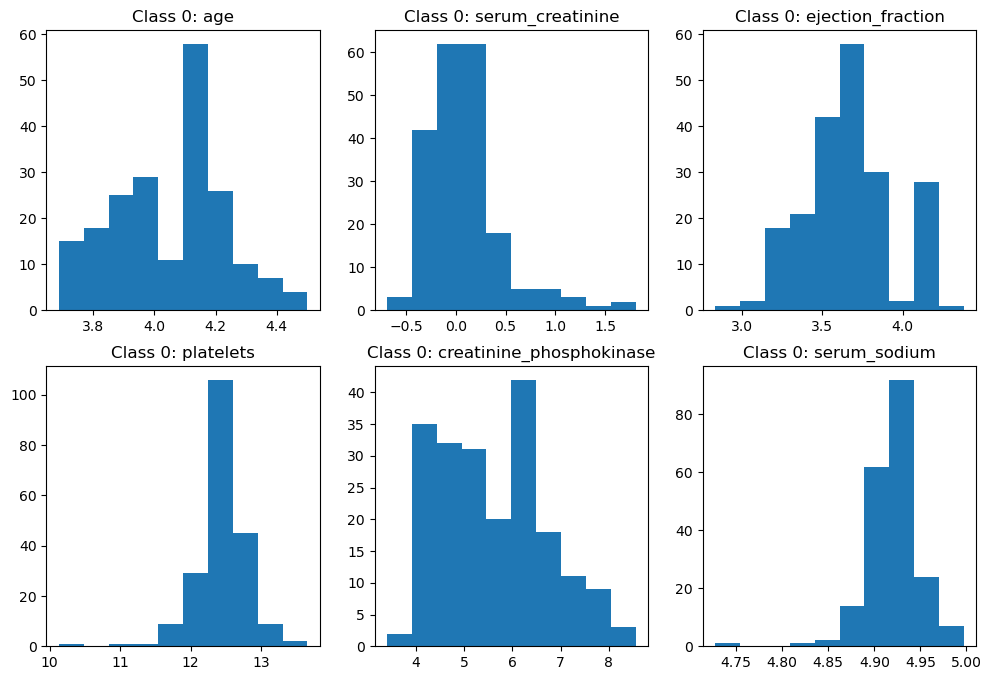

In [11]:
import matplotlib.pyplot as plt

# GNB, LDA, and QDA: Check if the predictors follow a Gaussian distribution within each class.
_, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(X0.shape[1]):
    row, col = i%2, i%3
    ax[row, col].hist(X0.iloc[:, i])
    ax[row, col].set_title(f"Class 0: {X0.columns[i]}")
plt.show()

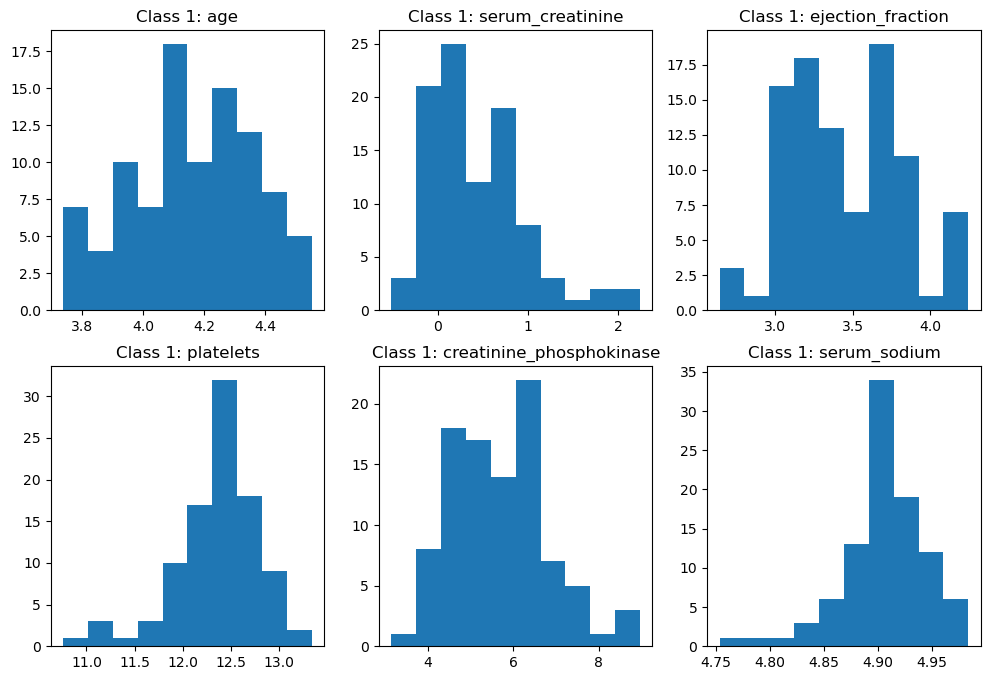

In [12]:
_, ax = plt.subplots(2,3, figsize=(12,8))
for i in range(X1.shape[1]):
    row, col = i%2, i%3
    ax[row, col].hist(X1.iloc[:, i])
    ax[row, col].set_title(f"Class 1: {X1.columns[i]}")
plt.show()